<h1>Hypothesis tests andz-scores</h1>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
!python3 -m pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [76]:
from scipy.stats import norm, rv_histogram

<h2>A/B testing</h2>

>In 2013, Electronic Arts (EA) released SimCity 5

>They wanted to increase pre-orders of the game

>They used A/B testing to test different advertising scenarios

>This involves splitting users into `control` and `treatment` groups

<h2>Retail webpage A/B test</h2>

### Control:

<img src = 'file:///Users/nguyentam/Desktop/Screenshot%202023-11-11%20at%2023.53.08.png'/>

### Treatment:

<img src = 'file:///Users/nguyentam/Desktop/Screenshot%202023-11-11%20at%2023.53.21.png'/>

>The treatment group (no ad) got 43.4% more purchases than the control group (with ad)
 
>Intuition that "Showing an ad would increase sales" was false

>Was this result statistically significant or just chance ?

>Need EA's data to determine this

>Techniques from Sampling in Python + this course to do so
  

<h2>Stack Overflow Developer Survey 2020</h2>

In [77]:
stack_overflow = pd.read_feather('Data/stack_overflow.feather')
stack_overflow.head(4)

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30


<h2>Hypothesizing about the mean</h2>

A hypothesis:

>The mean annual compensation(mức lương hàng năm) of the polulation of data scientists is $110.000

The point estimate (sample statistic):

In [78]:
stack_overflow['converted_comp'].mean()

119574.71738168952

<h2>Generating a bootstrap distribution</h2>

In [79]:
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(
        np.mean(
            stack_overflow.sample(frac=1, replace=True)['converted_comp']
        )
    )
print(so_boot_distn[:3])
np.array(so_boot_distn).shape

[114742.73551525874, 121863.70765148164, 124092.42680229987]


(5000,)

<h2>Visualizing the bootstrap distribution</h2>

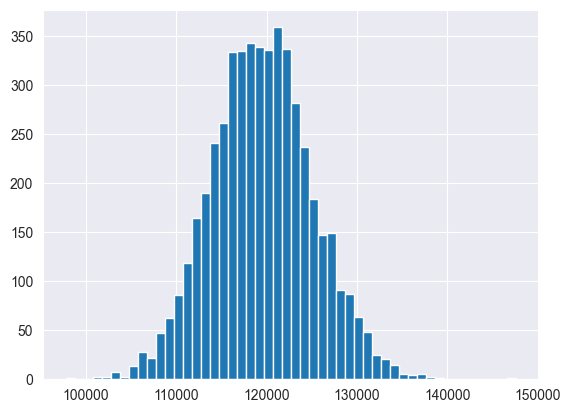

In [80]:
plt.hist(so_boot_distn, bins=50)
plt.show()

<h2>Standard error</h2>

In [81]:
std_error = np.std(so_boot_distn, ddof=1)
std_error

5603.61320974789

In [82]:
std = std_error*np.sqrt(len(stack_overflow['converted_comp']))
std

266451.6608150275

In [83]:
np.std(stack_overflow['converted_comp'])

265497.3410580749

<h2>Z-Score</h2>

`standardized value = (value - mean)/(standard deviation)`

In [84]:
stack_overflow['converted_comp'].mean()

119574.71738168952

In [85]:
mean_comp_hyp = 110000

In [86]:
std_error

5603.61320974789

In [87]:
z_scored = (stack_overflow['converted_comp'].mean() - mean_comp_hyp)/std_error
z_scored

1.7086685007155045

<h2>Testing the hypothesis</h2>

Is 1.707 a `high` or `low` number?
>This is the goal of the course

<h3>Hypothesis testing use case:</h3>

>Determine whether sample statistics are close to or far away from expected (or"hypothesized" values)

<h2>Standard normal (z) distribution</h2>

Standard normal distribution: normal distribution with **`mean = 0 + standard deviation = 1`**

In [88]:
r = norm.rvs(size=1000, scale = 1)
r[:15]

array([ 2.97326214e-05,  1.89131558e+00, -1.83493916e+00, -8.18761386e-01,
        1.74157349e+00, -2.58921427e-01,  3.48460083e-01,  6.26708274e-02,
        1.48276389e+00, -1.37204070e+00, -5.44932870e-01, -8.71225894e-01,
        1.40029849e-01, -1.68126548e+00,  9.16590761e-01])

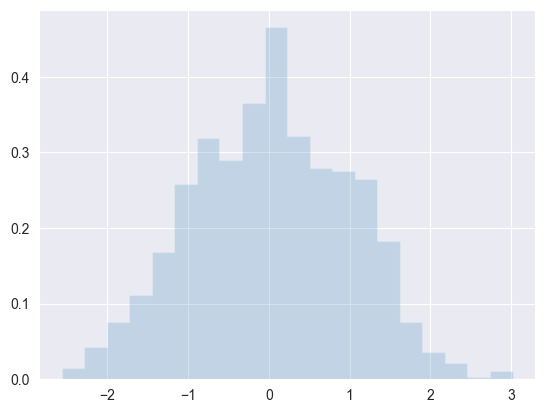

In [89]:
plt.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.show()

In [90]:
sns.histplot(norm.rvs(size=500), bins=len(x))

NameError: name 'x' is not defined

In [ ]:
dist = norm.pdf(stack_overflow['converted_comp'])

The z-score is a standardized measure of the difference between the sample statistic and the hypothesized statistic.

<h2>p-values</h2>

<h3>Age of first programming experience:</h3>

>`age_first_code_cut` classifies when Stack Overflow user first started programming
        "adult" means they **`started at 14`** or older"child" means they **`started before 14`**
        
>Previous research: 35% of software developers started programming as children
    
>Evidence that a greater proportion of data scientists starting programming as children?


<h3>Definition</h3>

A hypothesis is the statement about an unknown population parameter 
A hypothesis test is a test of two competing hypotheses
>The null hypothesis (Ho) is the existing idea
>The alternative(thay thế) hypothesis (Ha) is the new "challenger" idea of the researcher

For our problem:
>Ho:The proportion of data scientists starting programming as children is 35%
>Ha:The proportion of data scientists starting programming as children is greater 35%

In [91]:
first_code_boot_distn = stack_overflow.sample(frac=1, replace=True)
first_code_boot_distn = ([first_code_boot_distn['age_first_code_cut'] == "child"])
np.std(first_code_boot_distn, ddof=1)

0.48727310258125306

In [92]:
alpha = 0.05
prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean()
prop_child_hyp = 0.35
std_error = np.std(first_code_boot_distn, ddof=1)
# std_error = 0.010351057228878566
z_score = (prop_child_samp - prop_child_hyp) / std_error
p_value = 1 - norm._reduce_func(z_score, loc=0, scale=1)
z_score

TypeError: _reduce_func() got an unexpected keyword argument 'loc'

In [93]:
norm_dist = norm(loc = 0, scale = 1)

(1.0 - norm.ppf(0.95,norm_dist) / 2.0)

# Define the normal distribution
norm_dist = norm(loc = 0, scale = 1)

# Calculate the probability of being less than 0.95
prob_less_than_0_95 = norm.cdf(0.95, norm_dist)

# Calculate the 2.5th percentile
two_point_five_percentile = norm.ppf(0.95, norm_dist)

# Calculate the probability of being between 0 and 0.95
prob_between_0_and_0_95 = prob_less_than_0_95 - two_point_five_percentile / 2.0

print(prob_between_0_and_0_95)